In [270]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

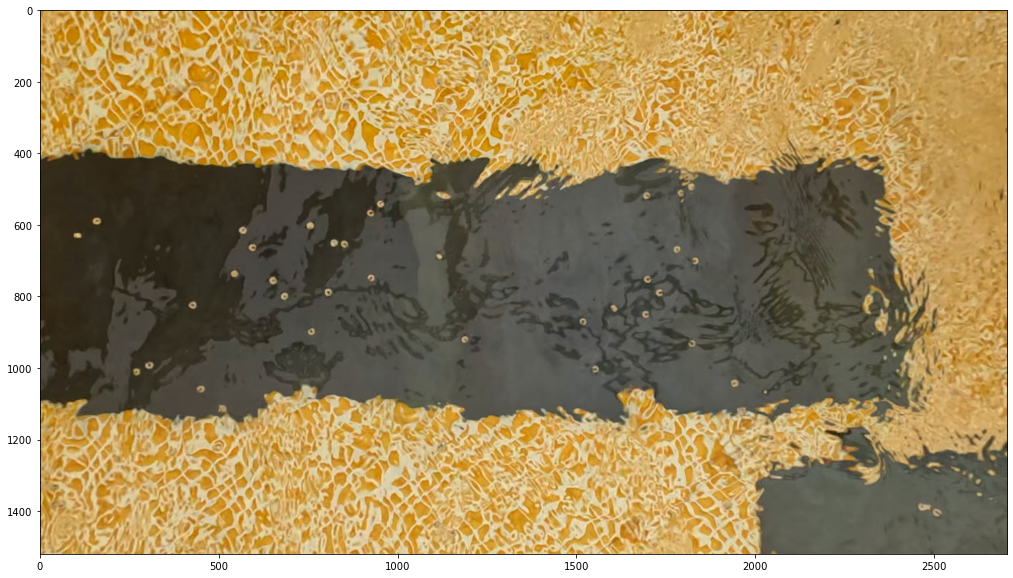

In [271]:
hoge = cv2.imread("iwasa2/2000.bmp", 1)
plt.subplots(figsize=(18, 10))
plt.imshow(hoge)

In [272]:
data = np.loadtxt("Book1.csv", delimiter=',', dtype=int)

In [273]:
HW = 22
P = 5

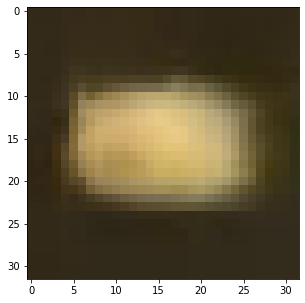

In [274]:
test = hoge[619-P:619+HW+P, 94-P:94+HW+P, :]
plt.subplots(figsize=(5, 5))
plt.imshow(test)

In [275]:
x = np.mean(np.vstack([test[:, 4], test[:, -4], test[4, :], test[-4, :]]), axis=0).astype(np.uint8)

In [276]:
center = (int((HW+2*P)/2), int((HW+2*P)/2))
angle = 45.0
scale = 1.0
trans = cv2.getRotationMatrix2D(center, angle, scale)

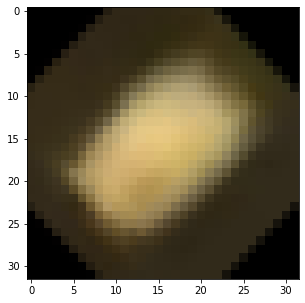

In [277]:
test2 = cv2.warpAffine(test, trans, (HW+2*P, HW+2*P))
plt.subplots(figsize=(5, 5))
plt.imshow(test2)

In [278]:
test2[test2[:, :, 0] < x[0] * 0.923] = x

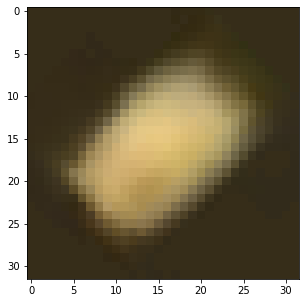

In [279]:
plt.subplots(figsize=(5, 5))
plt.imshow(test2)

In [280]:
for c in range(data.shape[0]):
    i, j = data[c]
    test = hoge[j-P:j+HW+P, i-P:i+HW+P, :]
    cv2.imwrite(f"iwasa/{c}.bmp", test)
    cv2.imwrite(f"iwasa/{c+data.shape[0]}.bmp", cv2.flip(test, 0))
    cv2.imwrite(f"iwasa/{c+data.shape[0]*2}.bmp", cv2.flip(test, 1))

    center = (int((HW+2*P)/2), int((HW+2*P)/2))
    scale = 1.0
    bg = np.mean(np.vstack([test[:, 4], test[:, -4], test[4, :], test[-4, :]]), axis=0).astype(np.uint8)
    cc = 0

    for deg in range(10, 360, 10):
        trans = cv2.getRotationMatrix2D(center, deg, scale)
        test2 = cv2.warpAffine(test, trans, (HW+2*P, HW+2*P))
        test2[test2[:, :, 0] < bg[0] * 0.926] = bg
        cv2.imwrite(f"iwasa/{c+data.shape[0]*(cc+3)}.bmp", test2)
        cc +=1